## Case Study 2 - Predict Credit Card Defaulters

## Problem Statement

 In this case study, we are going to build a classifier to calculate the probability of a custom credit card bills.

# Dataset

credit-default.csv


# Dataset Description:

Each row is about a customer.W have details about their savings, employment, age, marital sta default column (target column), we have value 1, if the customer has not defaulted and the customer has defaulted.


# Guidelines

1.	In the target column, replace 1 with 0 and 2 with 1. So that the defaulters will become 

2.	Summarize the dataset using various summarization techniques 

3.	Identify whether the target column is balanced or imbalanced. Plot the same using a simp 

4.	Perform exploratory data analysis to identify which ferentiate/infactors difluences customers who ar defaulting with others 
5.	Convert all categorical columns to numerical columns using one hot encoding (i.e. using variables technique) 
6.	Divide the dataset in to training (80%) and testing (20%). (Use random_state=1) 

7.	Standardize the input variables and use the same wherever required 

8.	Use the following algorithms to build a classifier 

 - Logistic regression: Make sure that you include only those variables which are signi and error method for the same)

 - Decision Trees
 
 - KNN

 - SVM
 
 - Randon Forest

9.	Wherever required, use trial and error method to identify optimal values for input param depth in decision trees, no. of neighbors in KNN etc) 
10.	Using all the models Predict the target class for test dataset and populate the followin report the same in a consolidated table 
   - Accuracy 

   - Sensitivity 

   - Specificity 

   - F1-score 

   - AUC 

11.	Plot the ROC curves for all the models in a single plot and identify the best model usin 

12.	Justify your choice of classifier 


In [1]:
# Import all required libraries
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_curve 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load and preview the Store dataset
credit = pd.read_csv('C:/Users/ejhajee/Downloads/Case Study Resources-20201127/credit-default.csv')
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


## Replace values in target column

In [3]:
# 1. In the target column, replace 1 with 0 and 2 with 1. So that the defaulters will become 
credit['default'] = credit['default'].replace({1:0, 2:1})

## 2. Summarize columns

In [4]:
# 2. Summarize the dataset using various summarization techniques 
credit.describe()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000,2.000000


## Data Dictionary
 - Variables - 21
 - Observations - 1000
 
## Integer Variables:
 - months_loan_duration
 - amount
 - installment_rate
 - residence_history
 - age
 - existing_credits
 - default
 - dependents
 
## Categorical Variables:
 - checking_balance
 - credit_history
 - purpose
 - savings_balance
 - employment_length
 - personal_status
 - other_debtors
 - property
 - installment_plan
 - housing
 - telephone
 - foreign_worker
 - job
 
 ## NA Values
 - None

In [ ]:
## 3. Balanced / Imbalanced target

In [5]:
credit.describe(include='object')

,checking_balance,credit_history,purpose,savings_balance,employment_length,personal_status,other_debtors,property,installment_plan,housing,telephone,foreign_worker,job
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,2,2,4
top,unknown,repaid,radio/tv,< 100 DM,1 - 4 yrs,single male,none,other,none,own,none,yes,skilled employee
freq,394,530,280,603,339,548,907,332,814,713,596,963,630


## 3. Balanced / Imbalanced target

In [23]:
# 3. Identify whether the target column is balanced or imbalanced. Plot the same using a simp 
credit['default'].value_counts() / credit.shape[0] * 100

0    70.0
1    30.0
Name: default, dtype: float64

In [7]:
# Imbalanced dataset

# 5. Convert all columns to numeric

In [8]:
# Convert all columns to numeric
credit_numerical = pd.get_dummies(credit, drop_first=True)

## 6. Split data in training & testing

In [9]:
target_col = 'default'

input_cols = credit_numerical.drop(target_col, axis=1).columns

train_x, test_x, train_y, test_y = train_test_split(credit_numerical[input_cols], credit_numerical[target_col], test_size=0.2, random_state=1)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((800, 48), (200, 48), (800,), (200,))

## 7. Standardize dataset

In [10]:
scaler = StandardScaler().fit(train_x)

train_x_scaled = pd.DataFrame(scaler.transform(train_x), columns=train_x.columns, index=train_x.index)

test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns, index=test_x.index)


## 8. Build Classifier models

In [11]:
def get_model_metrics(actual, predicted, classifier_name): 
    acc = accuracy_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel() 
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) 
    fpr, tpr, thresholds = roc_curve(actual, predicted, pos_label=1) 
    auc_value = auc(fpr, tpr)
    return {'accuracy': acc, 'f1-score': f1,'classifier': classifier_name, 'sensitivity': sensitivity, 'specificity': specificity, 'AUC': auc_value, 'fpr_values': fpr, 'tpr_values': tpr}


In [12]:
res_cols = ['classifier', 'f1-score', 'sensitivity', 'specificity', 'AUC', 'accuracy'] 
df_results = pd.DataFrame(columns=res_cols)

In [13]:
# Logistic regression

classifier_name = 'Logistic Regression'

model = LogisticRegression().fit(train_x_scaled, train_y) 
test_y_pred = model.predict(test_x_scaled)
lg_metrics = get_model_metrics(test_y, test_y_pred, classifier_name) 
print(lg_metrics)
if classifier_name not in df_results['classifier'].values: df_results = df_results.append(lg_metrics, ignore_index=True)



{'accuracy': 0.75, 'f1-score': 0.5, 'classifier': 'Logistic Regression', 'sensitivity': 0.423728813559322, 'specificity': 0.8865248226950354, 'AUC': 0.6551268181271788, 'fpr_values': array([0.        , 0.11347518, 1.        ]), 'tpr_values': array([0.        , 0.42372881, 1.        ])}


In [14]:
# Decision Trees

classifier_name = 'Decision Tree'
model = DecisionTreeClassifier(max_depth=8, random_state=1).fit(train_x_scaled, train_y)
test_y_pred = model.predict(test_x_scaled)
dt_metrics = get_model_metrics(test_y, test_y_pred, classifier_name) 
print(dt_metrics)
if classifier_name not in df_results['classifier'].values: 
    df_results = df_results.append(dt_metrics, ignore_index=True)


{'accuracy': 0.7, 'f1-score': 0.5238095238095237, 'classifier': 'Decision Tree', 'sensitivity': 0.559322033898305, 'specificity': 0.7588652482269503, 'AUC': 0.6590936410626277, 'fpr_values': array([0.        , 0.24113475, 1.        ]), 'tpr_values': array([0.        , 0.55932203, 1.        ])}


In [15]:
# KNN

classifier_name = 'KNN'
model = KNeighborsClassifier(n_neighbors=5).fit(train_x_scaled, train_y) 
test_y_pred = model.predict(test_x_scaled)
knn_metrics = get_model_metrics(test_y, test_y_pred, classifier_name) 
print(knn_metrics)
if classifier_name not in df_results['classifier'].values: 
    df_results = df_results.append(knn_metrics, ignore_index=True)


{'accuracy': 0.72, 'f1-score': 0.42857142857142855, 'classifier': 'KNN', 'sensitivity': 0.3559322033898305, 'specificity': 0.8723404255319149, 'AUC': 0.6141363144608727, 'fpr_values': array([0.        , 0.12765957, 1.        ]), 'tpr_values': array([0.       , 0.3559322, 1.       ])}


In [16]:
# SVM

classifier_name = 'SVM'
model = SVC().fit(train_x_scaled, train_y) 
test_y_pred = model.predict(test_x_scaled)
df_results.drop(['fpr_values', 'tpr_values'], axis=1)
svm_metrics = get_model_metrics(test_y, test_y_pred, classifier_name) 
print(svm_metrics)
if classifier_name not in df_results['classifier'].values: 
    df_results = df_results.append(svm_metrics, ignore_index=True)


{'accuracy': 0.765, 'f1-score': 0.4719101123595506, 'classifier': 'SVM', 'sensitivity': 0.3559322033898305, 'specificity': 0.9361702127659575, 'AUC': 0.646051208077894, 'fpr_values': array([0.        , 0.06382979, 1.        ]), 'tpr_values': array([0.       , 0.3559322, 1.       ])}


In [20]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

classifier_name = 'Random Forest'
RFC = RandomForestClassifier(max_depth=5, random_state=0)

model = RFC.fit(train_x_scaled, train_y) 
test_y_pred = model.predict(test_x_scaled)
df_results.drop(['fpr_values', 'tpr_values'], axis=1)
rnd_metrics = get_model_metrics(test_y, test_y_pred, classifier_name) 
print(rnd_metrics)
if classifier_name not in df_results['classifier'].values: 
    df_results = df_results.append(rnd_metrics, ignore_index=True)


{'accuracy': 0.725, 'f1-score': 0.2465753424657534, 'classifier': 'Random Forest', 'sensitivity': 0.15254237288135594, 'specificity': 0.9645390070921985, 'AUC': 0.5585406899867772, 'fpr_values': array([0.        , 0.03546099, 1.        ]), 'tpr_values': array([0.        , 0.15254237, 1.        ])}


In [21]:
df_results.drop(['fpr_values', 'tpr_values'], axis=1)

,classifier,f1-score,sensitivity,specificity,AUC,accuracy
0,Logistic Regression,0.500000,0.423729,0.886525,0.655127,0.750
1,Decision Tree,0.523810,0.559322,0.758865,0.659094,0.700
2,KNN,0.428571,0.355932,0.872340,0.614136,0.720
3,SVM,0.471910,0.355932,0.936170,0.646051,0.765
4,Random Forest,0.246575,0.152542,0.964539,0.558541,0.725


## 11. Plot ROC curves

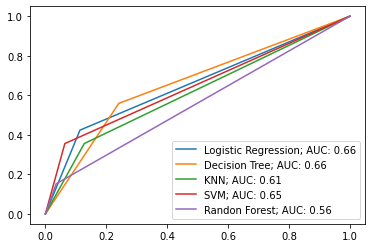

In [19]:
plt.plot(lg_metrics['fpr_values'], lg_metrics['tpr_values']) 
plt.plot(dt_metrics['fpr_values'], dt_metrics['tpr_values']) 
plt.plot(knn_metrics['fpr_values'], knn_metrics['tpr_values']) 
plt.plot(svm_metrics['fpr_values'], svm_metrics['tpr_values']) 
plt.plot(rnd_metrics['fpr_values'], rnd_metrics['tpr_values']) 
plt.legend(['Logistic Regression; AUC: %.2f' % lg_metrics['AUC'],'Decision Tree; AUC: %.2f' % dt_metrics['AUC'], 'KNN; AUC: %.2f' % knn_metrics['AUC'],'SVM; AUC: %.2f' % svm_metrics['AUC'],'Randon Forest; AUC: %.2f' % rnd_metrics['AUC'],])


## 12. Justify your choice of classifier 

### Mathematically 4 parameters (f1-score, sensitivity, specificity & AUC) for Decision Tree is greater than other 3 classifiers (Logistic Regression, KNN & SVM) and Accuracy is 70% which is also satisfactory.

 ### According to business strategy, accuracy is the important part which is higher for SVM, so I would suggest to use SVM for modelling.